In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz
!tar xf spark-3.0.1-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=2cb723d99762d8e0342e0d49fde44cfe6d218698c344d295ad2944a0575e2bb4
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [69]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop2.7"
import findspark
findspark.init("spark-3.0.1-bin-hadoop2.7")
from pyspark.sql import SparkSession

# Create Spark session
spark = SparkSession.builder \
    .appName("Spark_Colab") \
    .getOrCreate()

## Giới thiệu dataset

In [70]:
# Replace 'weather_data.csv' with the name of your uploaded file
df = spark.read.csv('seattle-weather.csv', header=True, inferSchema=True)

In [71]:
df.show()

+----------+-------------+--------+--------+----+-------+
|      date|precipitation|temp_max|temp_min|wind|weather|
+----------+-------------+--------+--------+----+-------+
|2012-01-01|          0.0|    12.8|     5.0| 4.7|drizzle|
|2012-01-02|         10.9|    10.6|     2.8| 4.5|   rain|
|2012-01-03|          0.8|    11.7|     7.2| 2.3|   rain|
|2012-01-04|         20.3|    12.2|     5.6| 4.7|   rain|
|2012-01-05|          1.3|     8.9|     2.8| 6.1|   rain|
|2012-01-06|          2.5|     4.4|     2.2| 2.2|   rain|
|2012-01-07|          0.0|     7.2|     2.8| 2.3|   rain|
|2012-01-08|          0.0|    10.0|     2.8| 2.0|    sun|
|2012-01-09|          4.3|     9.4|     5.0| 3.4|   rain|
|2012-01-10|          1.0|     6.1|     0.6| 3.4|   rain|
|2012-01-11|          0.0|     6.1|    -1.1| 5.1|    sun|
|2012-01-12|          0.0|     6.1|    -1.7| 1.9|    sun|
|2012-01-13|          0.0|     5.0|    -2.8| 1.3|    sun|
|2012-01-14|          4.1|     4.4|     0.6| 5.3|   snow|
|2012-01-15|  

In [72]:
df.describe().show()

+-------+----------+------------------+-----------------+-----------------+------------------+-------+
|summary|      date|     precipitation|         temp_max|         temp_min|              wind|weather|
+-------+----------+------------------+-----------------+-----------------+------------------+-------+
|  count|      1461|              1461|             1461|             1461|              1461|   1461|
|   mean|      null|3.0294318959616757|16.43908281998628|8.234770704996588| 3.241136208076654|   null|
| stddev|      null|  6.68019432231474|7.349758097360173|5.023004179961267|1.4378250588746202|   null|
|    min|2012-01-01|               0.0|             -1.6|             -7.1|               0.4|drizzle|
|    max|2015-12-31|              55.9|             35.6|             18.3|               9.5|    sun|
+-------+----------+------------------+-----------------+-----------------+------------------+-------+



In [73]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import to_date, year, month, dayofmonth

# Chuyển đổi cột 'date' thành kiểu dữ liệu DateType
df = df.withColumn("date", to_date(df["date"], "yyyy-MM-dd"))

# Trích xuất các thành phần năm, tháng, ngày
df = df.withColumn("year", year(df["date"]))
df = df.withColumn("month", month(df["date"]))
df = df.withColumn("day", dayofmonth(df["date"]))

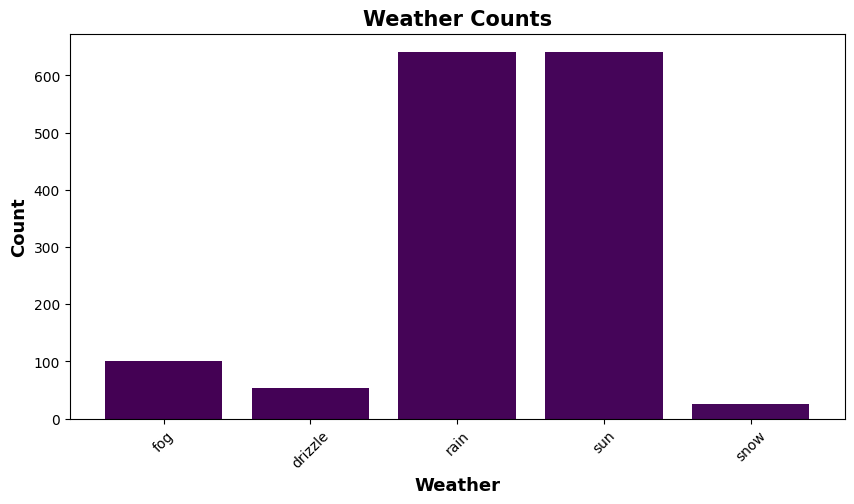

In [74]:
# Group by 'weather' column and count the occurrences of each type of weather
weather_counts = df.groupBy('weather').count()

# Collect the data to the driver node
weather_counts_collected = weather_counts.collect()

# Convert the collected data to a format suitable for plotting
weather_labels = [row['weather'] for row in weather_counts_collected]
weather_counts_values = [row['count'] for row in weather_counts_collected]

# Plot the data using matplotlib
plt.figure(figsize=(10, 5))
plt.bar(weather_labels, weather_counts_values, color=plt.cm.viridis(range(len(weather_labels))))
plt.xlabel("Weather", fontweight='bold', size=13)
plt.ylabel("Count", fontweight='bold', size=13)
plt.xticks(rotation=45)
plt.title("Weather Counts", fontweight='bold', size=15)
plt.show()

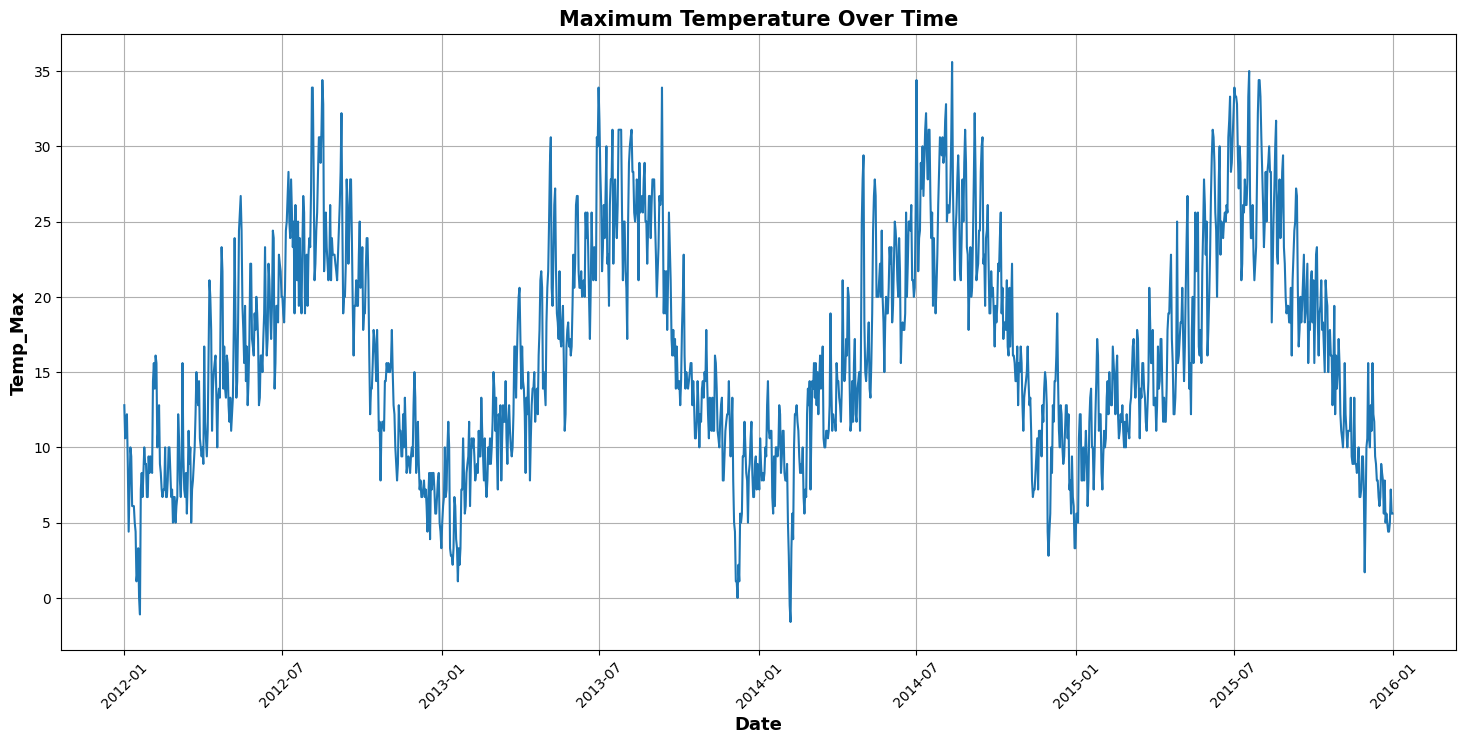

In [75]:
# Collect the data to the driver node
data_collected = df.select('date', 'temp_max').orderBy('date').collect()

# Convert the collected data to a format suitable for plotting
dates = [row['date'] for row in data_collected]
temp_max_values = [row['temp_max'] for row in data_collected]

# Plot the data using matplotlib
plt.figure(figsize=(18, 8))
plt.plot(dates, temp_max_values, linestyle='-')
plt.xlabel("Date", fontweight='bold', size=13)
plt.ylabel("Temp_Max", fontweight='bold', size=13)
plt.title("Maximum Temperature Over Time", fontweight='bold', size=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

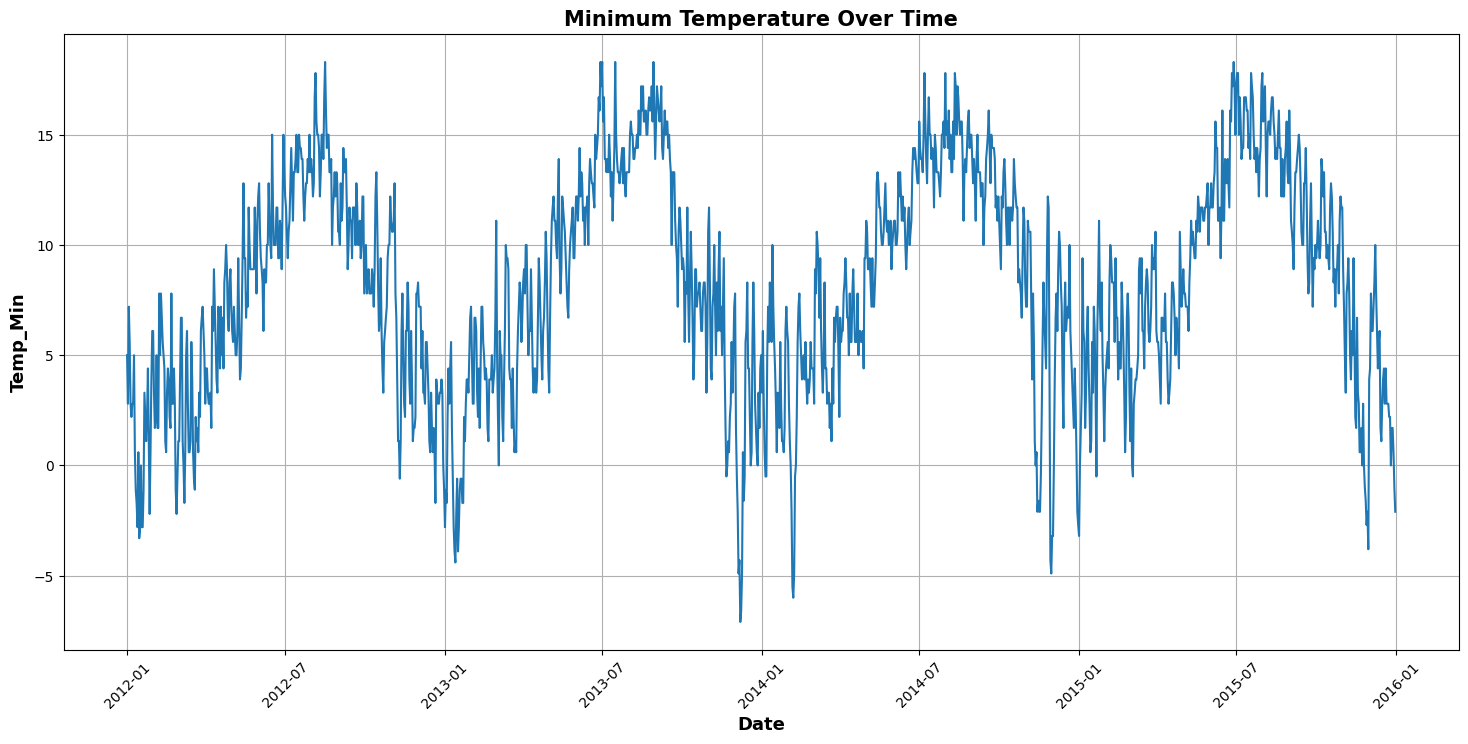

In [76]:
# Collect the data to the driver node
data_collected = df.select('date', 'temp_min').orderBy('date').collect()

# Convert the collected data to a format suitable for plotting
dates = [row['date'] for row in data_collected]
temp_min_values = [row['temp_min'] for row in data_collected]

# Plot the data using matplotlib
plt.figure(figsize=(18, 8))
plt.plot(dates, temp_min_values, linestyle='-')
plt.xlabel("Date", fontweight='bold', size=13)
plt.ylabel("Temp_Min", fontweight='bold', size=13)
plt.title("Minimum Temperature Over Time", fontweight='bold', size=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

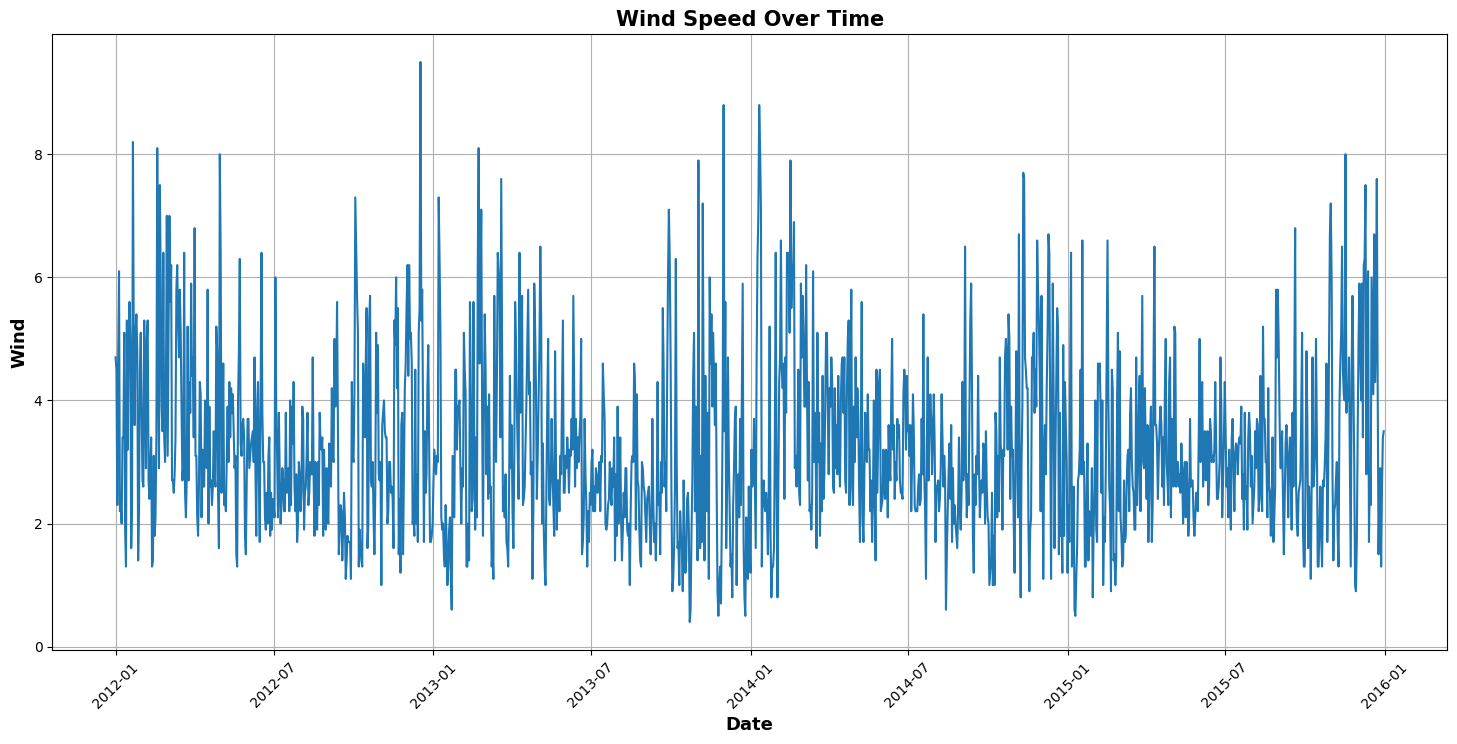

In [77]:
# Collect the data to the driver node
data_collected = df.select('date', 'wind').orderBy('date').collect()

# Convert the collected data to a format suitable for plotting
dates = [row['date'] for row in data_collected]
wind_values = [row['wind'] for row in data_collected]

# Plot the data using matplotlib
plt.figure(figsize=(18, 8))
plt.plot(dates, wind_values, linestyle='-')
plt.xlabel("Date", fontweight='bold', size=13)
plt.ylabel("Wind", fontweight='bold', size=13)
plt.title("Wind Speed Over Time", fontweight='bold', size=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Tiền xử lý dữ liệu

In [78]:
# Import các thư viện cần thiết
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when, to_date, year, month, dayofmonth, mean
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler

In [79]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline

# Drop rows with any missing values
df_cleaned = df.dropna()

# Convert categorical variables into numerical values
categorical_cols = ['weather']
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index").fit(df_cleaned) for col in categorical_cols]
encoder = OneHotEncoder(inputCols=[f"{col}_index" for col in categorical_cols],
                        outputCols=[f"{col}_encoded" for col in categorical_cols])

# Assemble features
feature_cols = ['precipitation', 'temp_max', 'temp_min', 'wind', 'weather_encoded']
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Create pipeline
pipeline = Pipeline(stages=indexers + [encoder, assembler])

# Fit and transform data
pipeline_model = pipeline.fit(df_cleaned)
transformed_data = pipeline_model.transform(df_cleaned)


In [80]:
weather_mapping = dict(zip(indexers[0].labels, indexers[0].transform(df_cleaned).select('weather_index').distinct().rdd.map(lambda r: r[0]).collect()))

# Invert the dictionary to get numerical index as key and weather as value
weather_mapping_inverted = {index: weather for weather, index in weather_mapping.items()}

# Print the corrected mapping
print("Weather Index Mapping:")
for index, weather in sorted(weather_mapping_inverted.items()):
    print(f"{index}: {weather}")


Weather Index Mapping:
0.0: rain
1.0: sun
2.0: snow
3.0: drizzle
4.0: fog


# SMA

## Identify overall trend of max_temp and precipitation

In [81]:
transformed_data.show(3)

+----------+-------------+--------+--------+----+-------+----+-----+---+-------------+---------------+--------------------+
|      date|precipitation|temp_max|temp_min|wind|weather|year|month|day|weather_index|weather_encoded|            features|
+----------+-------------+--------+--------+----+-------+----+-----+---+-------------+---------------+--------------------+
|2012-01-01|          0.0|    12.8|     5.0| 4.7|drizzle|2012|    1|  1|          3.0|  (4,[3],[1.0])|(8,[1,2,3,7],[12....|
|2012-01-02|         10.9|    10.6|     2.8| 4.5|   rain|2012|    1|  2|          0.0|  (4,[0],[1.0])|[10.9,10.6,2.8,4....|
|2012-01-03|          0.8|    11.7|     7.2| 2.3|   rain|2012|    1|  3|          0.0|  (4,[0],[1.0])|[0.8,11.7,7.2,2.3...|
+----------+-------------+--------+--------+----+-------+----+-----+---+-------------+---------------+--------------------+
only showing top 3 rows



In [82]:
# Define a function to calculate the SMA for a given window size
def calculate_sma(data, window_size):
    sma_values = []
    for i in range(len(data)):
        if i < window_size - 1:
            sma_values.append(None)  # Not enough data points to fill the window
        else:
            window = [val for val in data[i-window_size+1:i+1] if val is not None]  # Filter out None values
            if not window:
                sma_values.append(None)  # If all values in the window are None
            else:
                window_avg = sum(window) / len(window)
                sma_values.append(window_avg)
    return sma_values

# Helper function to calculate SMA for each partition
def calculate_sma_partition(iterator, window_size):
    data = list(iterator)
    temp_max_values = [float(row[1]) for row in data]  # Convert to float
    precipitation_values = [float(row[2]) for row in data]  # Convert to float
    dates = [row[0] for row in data]
    sma_temp_max = calculate_sma(temp_max_values, window_size)
    sma_precipitation = calculate_sma(precipitation_values, window_size)

    result = zip(dates, sma_temp_max, sma_precipitation)
    return result

# Extract date, temp_max, precipitation and weather_index from the transformed data
rdd = transformed_data.select("date", "features", "weather_index").rdd
data_rdd = rdd.map(lambda row: (row['date'], row['features'][1], row['features'][0], row['weather_index'])) # date - temp_max - precipitation
# Sort the data
data_rdd = data_rdd.sortBy(lambda row: row[0])
# Extract data to variables using map
dates_rdd = data_rdd.map(lambda row: row[0])
temp_max_rdd = data_rdd.map(lambda row: (row[0], float(row[1])))  # Convert to float
precipitation_rdd = data_rdd.map(lambda row: (row[0], float(row[2])))  # Convert to float
weather_indices_rdd = data_rdd.map(lambda row: (row[0], float(row[3]))) # convert to float

# Calculate the SMA using Spark's mapPartitions function
window_size = 200
sma_rdd = data_rdd.mapPartitions(lambda iterator: calculate_sma_partition(iterator, window_size))

sma_temp_max_rdd = sma_rdd.map(lambda row: (row[0], row[1]))
sma_precipitation_rdd = sma_rdd.map(lambda row: (row[0], row[2]))

# Define the custom schema
from pyspark.sql.types import StructType, StructField, DateType, FloatType

# Schema for sma_temp_max_rdd and sma_precipitation_rdd
schema = StructType([
    StructField("date", DateType(), True),
    StructField("value", FloatType(), True)
])


def converter(values_rdd, schema, withDate):
  values_df = spark.createDataFrame(values_rdd, schema)
  values = values_df.select("value").rdd.flatMap(lambda x: x).collect()
  if (withDate):
    dates = values_df.select("date").rdd.flatMap(lambda x: x).collect()
    return dates, values
  return values

# Calculate and plotting
def longterm_plot(values_rdd, sma_values_rdd, title, schema):
    dates, values = converter(values_rdd, schema, True)
    sma_values = converter(sma_values_rdd, schema, False)
    # Plot the original temp_max values and SMA values using Matplotlib
    plt.figure(figsize=(12, 6))
    plt.plot(dates, values, label=title)
    plt.plot(dates, sma_values, label=f'SMA (window size = {window_size})')
    plt.xlabel('Date')
    plt.ylabel(title)
    plt.title('Simple Moving Average (SMA) of ' + title)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    # Provide insights based on the SMA
    # Filter out None values from SMA for comparison
    valid_sma_values = [sma for sma in sma_values if sma is not None]
    # Insight 2: Volatility observation
    volatility = sum([abs(values[i] - sma_values[i]) for i in range(window_size - 1, len(sma_values)) if sma_values[i] is not None])
    average_volatility = volatility / len(valid_sma_values)
    print(f"The average volatility in the {title} over the observed period is {average_volatility:.2f}.")


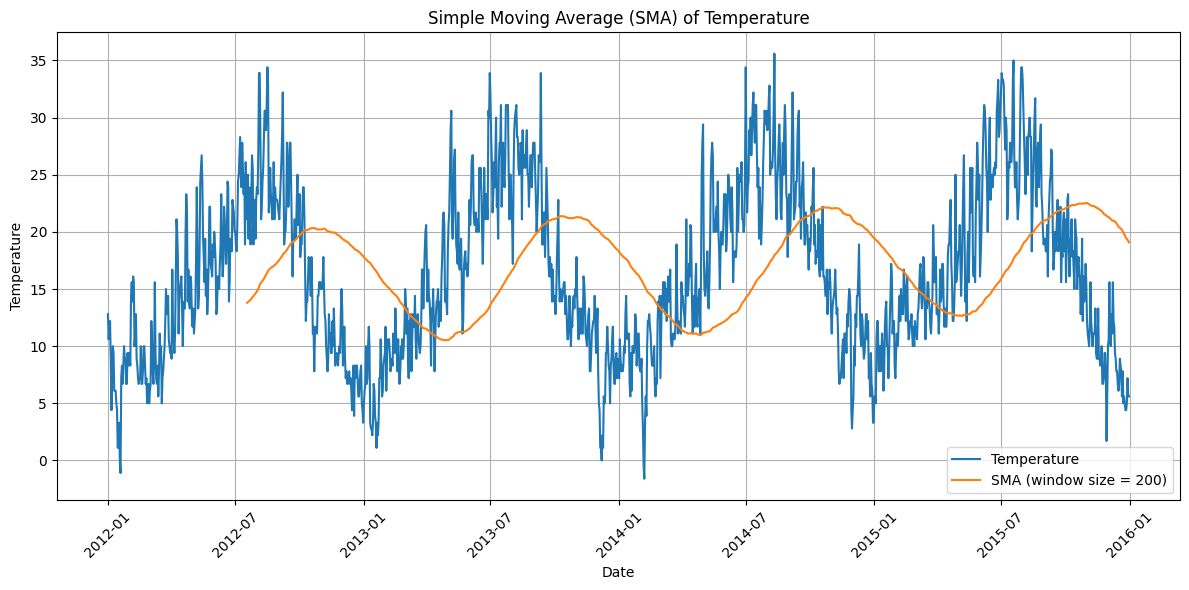

The average volatility in the Temperature over the observed period is 7.41.


In [83]:
longterm_plot(temp_max_rdd, sma_temp_max_rdd, 'Temperature', schema)


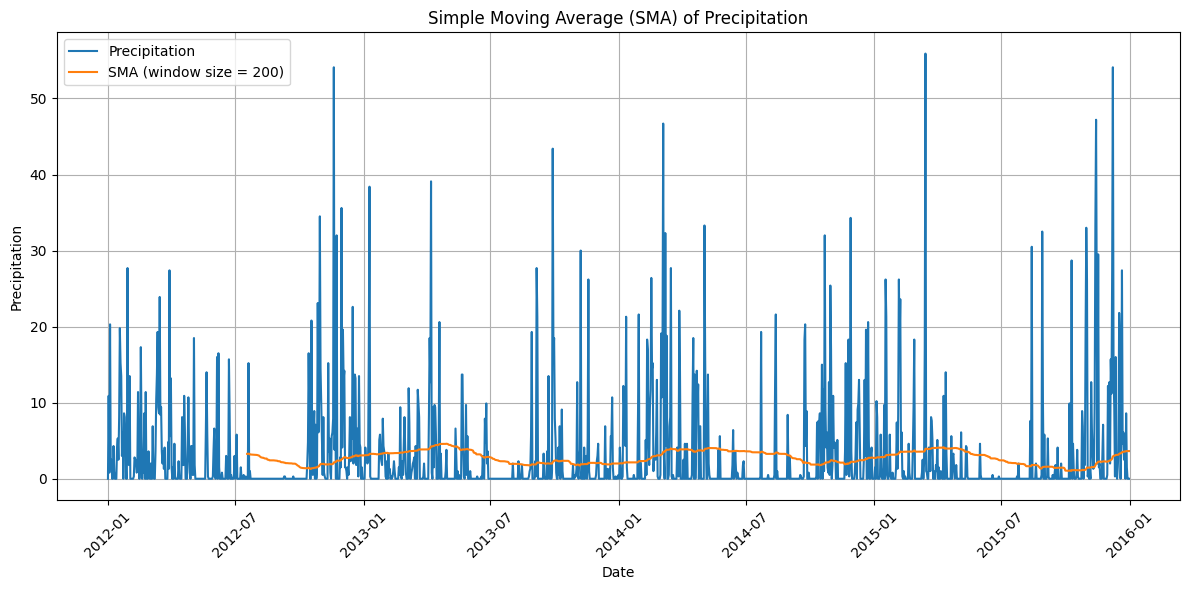

The average volatility in the Precipitation over the observed period is 4.07.


In [84]:
longterm_plot(precipitation_rdd, sma_precipitation_rdd, 'Precipitation', schema)

## Predict the trend happen outside the dataset

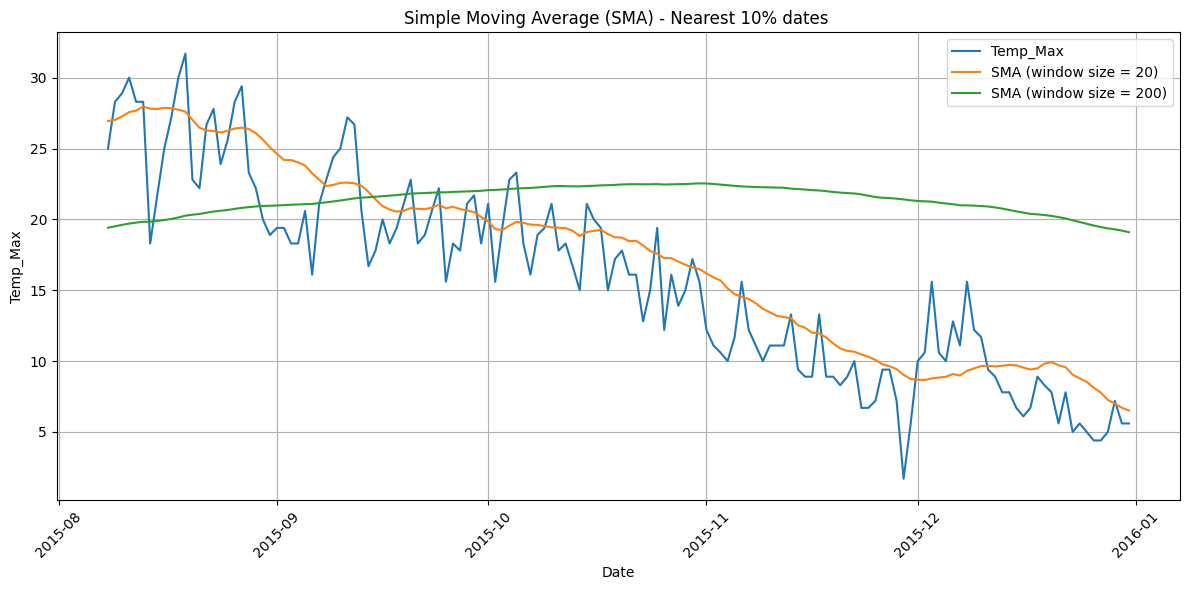

In [85]:
from pyspark.sql.types import StructType, StructField, DateType, FloatType

# Calculate the SMA using Spark's mapPartitions function
window_size_short = 20
window_size_long = 200
sma_short_rdd = data_rdd.mapPartitions(lambda iterator: calculate_sma_partition(iterator, window_size_short))
sma_long_rdd = data_rdd.mapPartitions(lambda iterator: calculate_sma_partition(iterator, window_size_long))

# Extract data to variables using map
sma_temp_max_short_rdd = sma_short_rdd.map(lambda row: (row[0], row[1]))
sma_temp_max_long_rdd = sma_long_rdd.map(lambda row: (row[0], row[1]))

# Calculate last 10% rdd
def get_last_10_percent(rdd):
    # Step 1: Determine the total number of elements in the RDD
    total_count = rdd.count()
    # Step 2: Calculate the number of elements corresponding to the last 10%
    percentage = 0.1
    num_elements_to_take = int(total_count * percentage)
    start_index = total_count - num_elements_to_take
    # Step 3: Use zipWithIndex to pair elements with their indices
    rdd_with_index = rdd.zipWithIndex()
    # Step 4: Filter elements based on the calculated starting index for the last 10%
    last_10_percent_rdd = rdd_with_index.filter(lambda x: x[1] >= start_index).map(lambda x: x[0])
    # Step 5: Use take() to retrieve the elements (this fetches the data to the driver)
    last_10_percent = last_10_percent_rdd.take(num_elements_to_take)
    return last_10_percent

last_values_rdd = get_last_10_percent(temp_max_rdd)
last_sma_temp_max_short_rdd = get_last_10_percent(sma_temp_max_short_rdd)
last_sma_temp_max_long_rdd = get_last_10_percent(sma_temp_max_long_rdd)

dates, values = converter(last_values_rdd, schema, True)
sma_values1 = converter(last_sma_temp_max_short_rdd, schema, False)
sma_values2 = converter(last_sma_temp_max_long_rdd, schema, False)

# Plot the original values and SMA values using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(dates, values, label = "Temp_Max")
plt.plot(dates, sma_values1, label=f'SMA (window size = {window_size_short})')
plt.plot(dates, sma_values2, label=f'SMA (window size = {window_size_long})')
plt.xlabel('Date')
plt.ylabel("Temp_Max")
plt.title(f'Simple Moving Average (SMA) - Nearest 10% dates ')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Detect trends and amonalities

In [86]:
# Continue from the previous steps
window_size = 3
sma_final_rdd = data_rdd.mapPartitions(lambda iterator: calculate_sma_partition(iterator, window_size))
sma_temp_max_final_rdd = sma_final_rdd.map(lambda row: (row[0], row[1]))

sma_values = converter(sma_temp_max_final_rdd, schema, False)
dates, temp_max_values = converter(temp_max_rdd, schema, True)
weather_indices = converter(weather_indices_rdd, schema, False)

# Detect periods of increase or decrease in the SMA
def detect_trends(sma_values):
    trends = []
    for i in range(1, len(sma_values)):
        if sma_values[i] is not None and sma_values[i-1] is not None:
            if sma_values[i] > sma_values[i-1]:
                trends.append('increasing')
            elif sma_values[i] < sma_values[i-1]:
                trends.append('decreasing')
            else:
                trends.append('stable')
        else:
            trends.append(None)
    return trends

# Identify anomalies where the temp_max deviates significantly from the SMA
def detect_anomalies(temp_values, sma_values, threshold=5.0):
    anomalies = []
    for i in range(len(temp_values)):
        if sma_values[i] is not None and abs(temp_values[i] - sma_values[i]) > threshold:
            anomalies.append((dates[i], temp_values[i]))
    return anomalies



In [87]:
# Detect trends in the SMA
trends = detect_trends(sma_values)
# Detect anomalies
anomalies = detect_anomalies(temp_max_values, sma_values)

# Print detected trends
print("Detected Trends in SMA:")
for date, trend in zip(dates[1:], trends[1:]):
    if trend is not None:
        print(f"Date: {date}, Trend: {trend}")

# Print detected anomalies
print("\nDetected Anomalies:")
for anomaly in anomalies:
    print(f"Date: {anomaly[0]}, Temp Max: {anomaly[1]}")


Detected Trends in SMA:
Date: 2012-01-03, Trend: decreasing
Date: 2012-01-04, Trend: decreasing
Date: 2012-01-05, Trend: decreasing
Date: 2012-01-06, Trend: decreasing
Date: 2012-01-07, Trend: increasing
Date: 2012-01-08, Trend: increasing
Date: 2012-01-09, Trend: decreasing
Date: 2012-01-10, Trend: decreasing
Date: 2012-01-11, Trend: decreasing
Date: 2012-01-12, Trend: decreasing
Date: 2012-01-13, Trend: decreasing
Date: 2012-01-14, Trend: decreasing
Date: 2012-01-15, Trend: decreasing
Date: 2012-01-16, Trend: decreasing
Date: 2012-01-17, Trend: decreasing
Date: 2012-01-18, Trend: decreasing
Date: 2012-01-19, Trend: increasing
Date: 2012-01-20, Trend: increasing
Date: 2012-01-21, Trend: increasing
Date: 2012-01-22, Trend: increasing
Date: 2012-01-23, Trend: increasing
Date: 2012-01-24, Trend: increasing
Date: 2012-01-25, Trend: increasing
Date: 2012-01-26, Trend: decreasing
Date: 2012-01-27, Trend: decreasing
Date: 2012-01-28, Trend: increasing
Date: 2012-01-29, Trend: increasing
Date

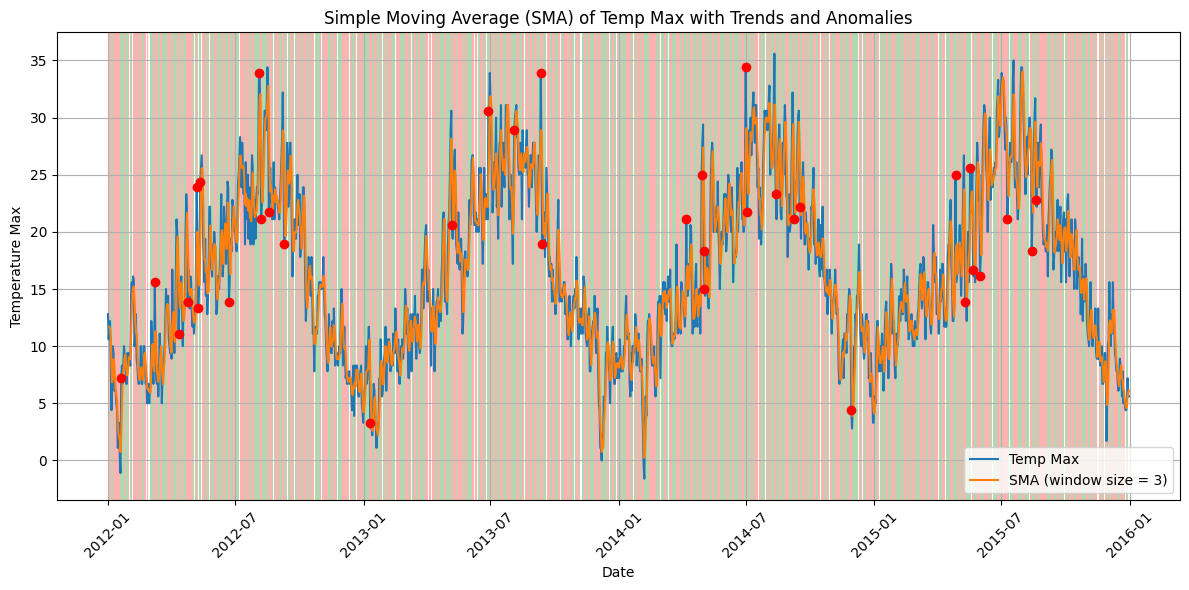

In [88]:
# Plot trends and anomalies on the graph
plt.figure(figsize=(12, 6))
plt.plot(dates, temp_max_values, label='Temp Max')
plt.plot(dates, sma_values, label=f'SMA (window size = {window_size})')

# Highlight trends
for i in range(1, len(trends)):
    if trends[i] == 'increasing':
        plt.axvspan(dates[i-1], dates[i], color='green', alpha=0.3, lw=0)
    elif trends[i] == 'decreasing':
        plt.axvspan(dates[i-1], dates[i], color='red', alpha=0.3, lw=0)
# Highlight anomalies
for anomaly in anomalies:
    plt.plot(anomaly[0], anomaly[1], 'ro')  # red dot for anomalies

plt.xlabel('Date')
plt.ylabel('Temperature Max')
plt.title('Simple Moving Average (SMA) of Temp Max with Trends and Anomalies')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Trend Counts by Weather Index:
Weather Index 0.0: {'increasing': 267, 'decreasing': 320, 'stable': 53}
Weather Index 1.0: {'increasing': 341, 'decreasing': 266, 'stable': 32}
Weather Index 2.0: {'increasing': 49, 'decreasing': 48, 'stable': 4}
Weather Index 3.0: {'increasing': 17, 'decreasing': 32, 'stable': 3}
Weather Index 4.0: {'increasing': 8, 'decreasing': 16, 'stable': 2}


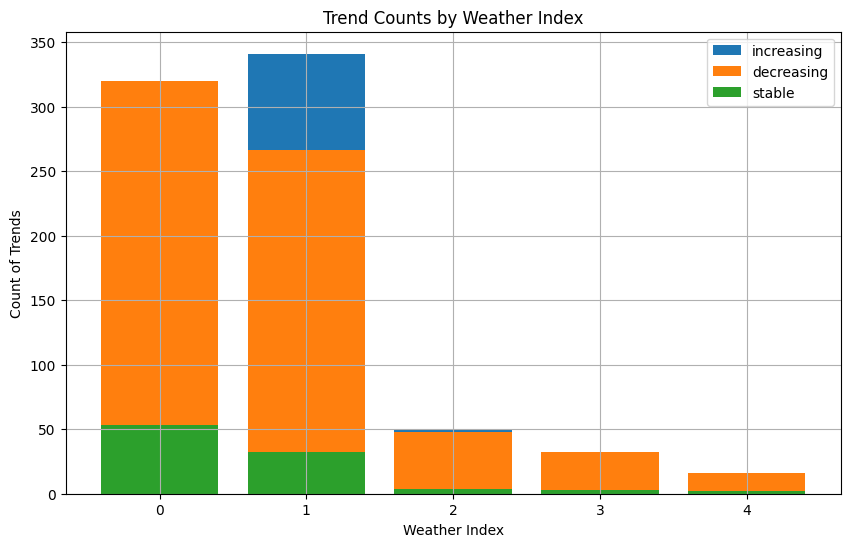

In [89]:
# Analyze the relationship between weather index and detected trends/anomalies
trend_counts_by_weather = {weather: {'increasing': 0, 'decreasing': 0, 'stable': 0} for weather in set(weather_indices)}

for i in range(1, len(trends)):
    if trends[i] is not None:
        weather = weather_indices[i]
        trend_counts_by_weather[weather][trends[i]] += 1

# Print the trend counts by weather index
print("Trend Counts by Weather Index:")
for weather, counts in trend_counts_by_weather.items():
    print(f"Weather Index {weather}: {counts}")

# Plot trend counts by weather index
plt.figure(figsize=(10, 6))
for trend_type in ['increasing', 'decreasing', 'stable']:
    plt.bar(trend_counts_by_weather.keys(),
            [trend_counts_by_weather[weather][trend_type] for weather in trend_counts_by_weather.keys()],
            label=trend_type)
plt.xlabel('Weather Index')
plt.ylabel('Count of Trends')
plt.title('Trend Counts by Weather Index')
plt.legend()
plt.grid(True)
plt.show()


## Evaluate the SMA by window sizes

In [90]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_metrics(actual_values, predicted_values):
    # Removing None values for comparison
    valid_indices = [i for i in range(len(predicted_values)) if predicted_values[i] is not None]
    actual_values = np.array([actual_values[i] for i in valid_indices])
    predicted_values = np.array([predicted_values[i] for i in valid_indices])

    mse = np.mean((actual_values - predicted_values) ** 2)
    mae = np.mean(np.abs(actual_values - predicted_values))
    rmse = np.sqrt(mse)

    return mse, mae, rmse

# Sample data (assuming already collected as in the provided code)
# rdd = transformed_data.select("date", "features", "weather_index").rdd
data = rdd.map(lambda row: (row['date'], row['features'][1], row['weather_index'], row['features'][0])).collect()  # Assuming temp_max is at index 1 in features
dates = [row[0] for row in data]
temp_max_values = [row[1] for row in data]
weather_indices = [row[2] for row in data]

# Calculate SMA for different window sizes
window_sizes = [3, 7, 20, 50, 200]
sma_results = {}
metrics_results = {}

for window_size in window_sizes:
    sma_values = calculate_sma(temp_max_values, window_size)
    sma_results[window_size] = sma_values
    mse, mae, rmse = calculate_metrics(temp_max_values, sma_values)
    metrics_results[window_size] = {'MSE': mse, 'MAE': mae, 'RMSE': rmse}

# Print the results
for window_size, metrics in metrics_results.items():
    print(f"Window Size: {window_size}")
    print(f"MSE: {metrics['MSE']}")
    print(f"MAE: {metrics['MAE']}")
    print(f"RMSE: {metrics['RMSE']}\n")


Window Size: 3
MSE: 4.337439646637727
MAE: 1.6236234864062145
RMSE: 2.0826520704711404

Window Size: 7
MSE: 8.911285503892277
MAE: 2.3425233186057928
RMSE: 2.9851776335575537

Window Size: 20
MSE: 12.028621203190015
MAE: 2.730142163661581
RMSE: 3.4682302696317637

Window Size: 50
MSE: 19.24149633427762
MAE: 3.465101983002833
RMSE: 4.386513004001882

Window Size: 200
MSE: 74.86849875059433
MAE: 7.407109746434234
RMSE: 8.652658478791032



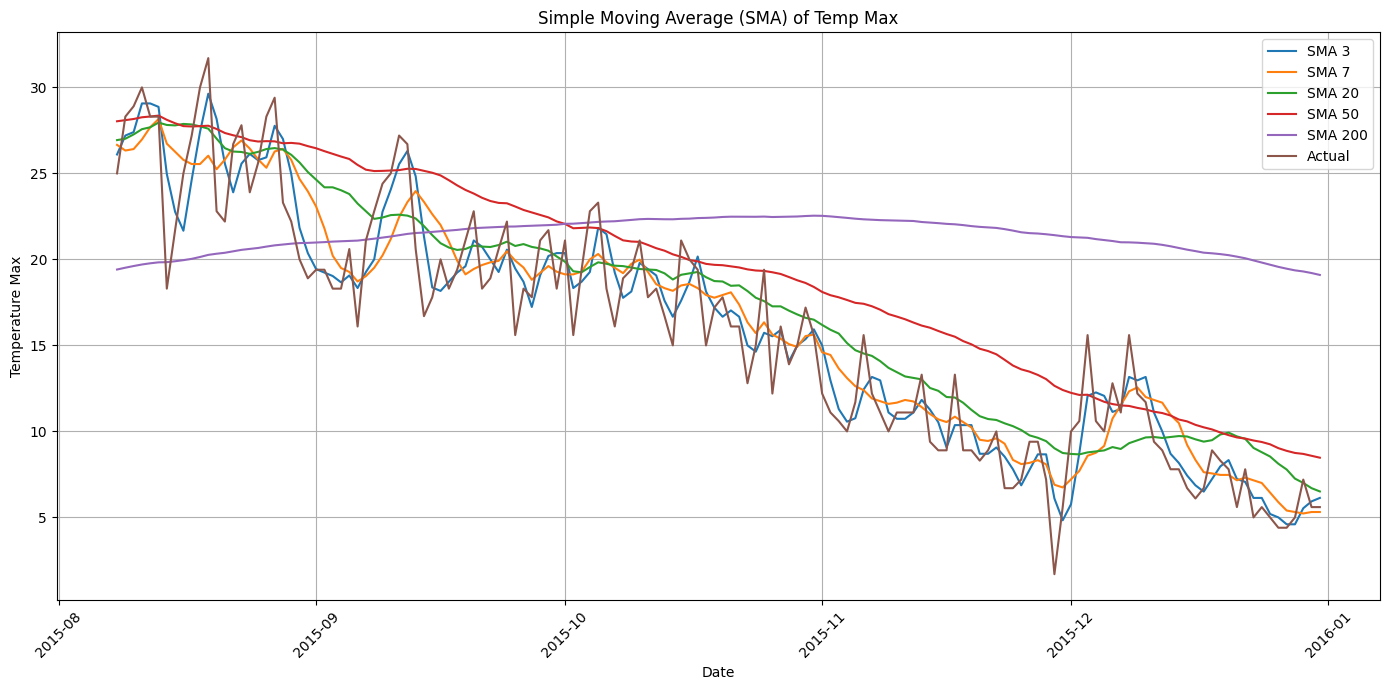

In [91]:
# Optionally plot the results for the nearest 10% dates
num_last_10_percent = len(dates) // 10
dates_last_10_percent = dates[-num_last_10_percent:]
temp_max_last_10_percent = temp_max_values[-num_last_10_percent:]

plt.figure(figsize=(14, 7))

for window_size in window_sizes:
    sma_values_last_10_percent = sma_results[window_size][-num_last_10_percent:]
    plt.plot(dates_last_10_percent, sma_values_last_10_percent, label=f'SMA {window_size}')

plt.plot(dates_last_10_percent, temp_max_last_10_percent, label='Actual')
plt.xlabel('Date')
plt.ylabel('Temperature Max')
plt.title('Simple Moving Average (SMA) of Temp Max')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
